In [14]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_csv("/content/PlayTennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [16]:
df.isna().sum()

,0
outlook,0
temp,0
humidity,0
windy,0
play,0


In [17]:
df.dtypes

,0
outlook,object
temp,object
humidity,object
windy,bool
play,object


In [18]:
LB = LabelEncoder()
for col in df.select_dtypes(include="object").columns:
  df[col] = LB.fit_transform(df[col])

In [19]:
df.dtypes

,0
outlook,int64
temp,int64
humidity,int64
windy,bool
play,int64


In [20]:
X = df.drop(["play"], axis=1)
Y = df["play"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

ID3 - Train Accuracy: 100.000
ID3 - Test Accuracy: 100.000


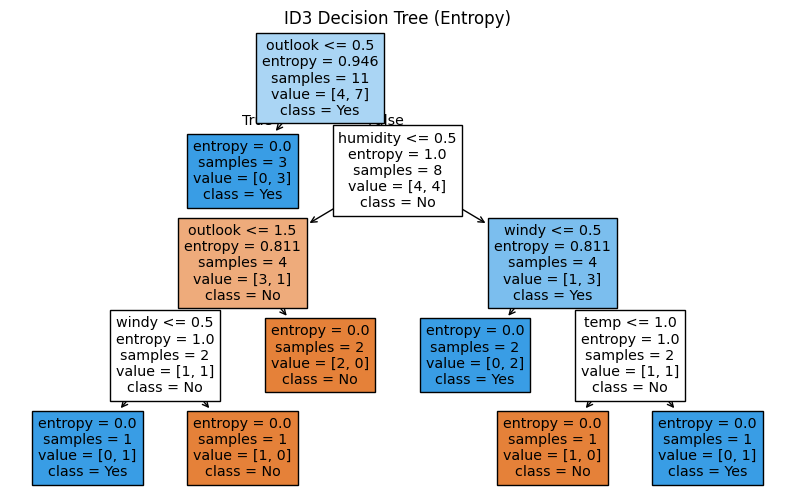

In [21]:
# Create and train ID3 model
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
id3_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_id3 = id3_model.predict(x_test)

train_acc_id3 = accuracy_score(y_train, id3_model.predict(x_train)) * 100
test_acc_id3 = accuracy_score(y_test, y_pred_id3) * 100

print(f"ID3 - Train Accuracy: {train_acc_id3:.3f}")
print(f"ID3 - Test Accuracy: {test_acc_id3:.3f}")

# Display tree structure
plt.figure(figsize=(10, 6))
plot_tree(id3_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("ID3 Decision Tree (Entropy)")
plt.show()


CART - Train Accuracy: 100.000
CART - Test Accuracy: 100.000


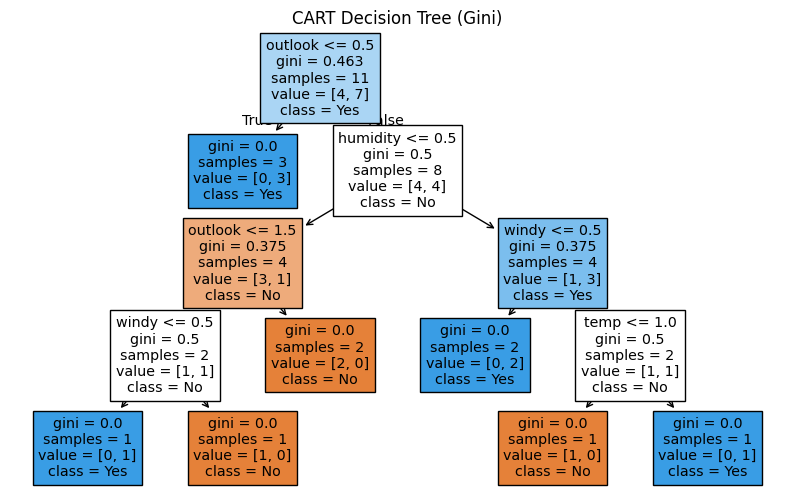

In [22]:
# Create and train CART model
cart_model = DecisionTreeClassifier(criterion='gini', random_state=0)
cart_model.fit(x_train, y_train)

# Predict and evaluate
y_pred_cart = cart_model.predict(x_test)

train_acc_cart = accuracy_score(y_train, cart_model.predict(x_train)) * 100
test_acc_cart = accuracy_score(y_test, y_pred_cart) * 100

print(f"CART - Train Accuracy: {train_acc_cart:.3f}")
print(f"CART - Test Accuracy: {test_acc_cart:.3f}")

# Display tree structure
plt.figure(figsize=(10, 6))
plot_tree(cart_model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("CART Decision Tree (Gini)")
plt.show()


In [23]:
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=0),
    n_estimators=10,
    oob_score=True,
    random_state=0
)

bagging_model.fit(x_train, y_train)

# Predictions
y_pred_bag = bagging_model.predict(x_test)

train_acc_bag = accuracy_score(y_train, bagging_model.predict(x_train)) * 100
test_acc_bag = accuracy_score(y_test, y_pred_bag) * 100

print(f"Bagging - Train Accuracy: {train_acc_bag:.3f}")
print(f"Bagging - Test Accuracy: {test_acc_bag:.3f}")
print(f"OOB Score: {bagging_model.oob_score_:.3f}")
print(f"OOB Error: {1 - bagging_model.oob_score_:.3f}")


Bagging - Train Accuracy: 72.727
Bagging - Test Accuracy: 100.000
OOB Score: 0.545
OOB Error: 0.455


In [24]:
def node_impurity(tree_model, node_index=0):
    # Counts of samples in each class at the node
    value = tree_model.tree_.value[node_index][0]
    total = value.sum()
    probs = value / total

    # Entropy
    entropy = -sum([p * math.log2(p) for p in probs if p > 0])

    # Gini
    gini = 1 - sum([p**2 for p in probs])

    return entropy, gini

entropy_root, gini_root = node_impurity(id3_model, 0)
print(f"ID3 Root Node - Entropy: {entropy_root:.3f}, Gini: {gini_root:.3f}")

entropy_root_cart, gini_root_cart = node_impurity(cart_model, 0)
print(f"CART Root Node - Entropy: {entropy_root_cart:.3f}, Gini: {gini_root_cart:.3f}")


ID3 Root Node - Entropy: 0.946, Gini: 0.463
CART Root Node - Entropy: 0.946, Gini: 0.463


In [25]:
def node_impurity(tree_model, node_index=0):
    # Counts of samples in each class at the node
    value = tree_model.tree_.value[node_index][0]
    total = value.sum()
    probs = value / total

    # Entropy
    entropy = -sum([p * math.log2(p) for p in probs if p > 0])

    # Gini
    gini = 1 - sum([p**2 for p in probs])

    return entropy, gini

entropy_root, gini_root = node_impurity(id3_model, 0)
print(f"ID3 Root Node - Entropy: {entropy_root:.3f}, Gini: {gini_root:.3f}")

entropy_root_cart, gini_root_cart = node_impurity(cart_model, 0)
print(f"CART Root Node - Entropy: {entropy_root_cart:.3f}, Gini: {gini_root_cart:.3f}")


ID3 Root Node - Entropy: 0.946, Gini: 0.463
CART Root Node - Entropy: 0.946, Gini: 0.463


### 1. What is the role of bootstrap sampling in bagging?

Bootstrap sampling is the process of generating multiple training datasets by randomly sampling the original dataset **with replacement**. Each bootstrap sample is used to train a separate base model (decision tree, in this case).  

**Justification:**  
- Ensures that each tree sees a slightly different subset of data.  
- Introduces **diversity among the base models**, which is essential for reducing the overall variance of the ensemble.  
- Some samples are left out in each bootstrap (OOB samples), which can be used to estimate the model's test performance.

### 2. How does bagging influence variance and bias?

**Bagging effect:**

- **Variance:** Bagging **reduces variance** by averaging the predictions of multiple base models. This is particularly useful for high-variance models like decision trees.  
- **Bias:** Bagging does **not significantly reduce bias**, since all base models are trained on similar data distributions and have similar learning capabilities.  

**Justification:**  
- Single decision trees are prone to overfitting (high variance).  
- By aggregating multiple trees, bagging smooths out the fluctuations caused by individual trees.  
- The bias remains roughly the same because individual trees are still simple learners.

### 3. Why is OOB error considered an unbiased estimate of test performance?

**Explanation:**

- During bootstrap sampling, approximately 63% of the data is used in each sample, leaving ~37% as **out-of-bag (OOB) samples**.  
- Each OOB sample is **not seen** by the corresponding tree during training.  
- By predicting the OOB samples using the trees that did not see them, we get an **estimate of model performance on unseen data**.  

**Justification:**  
- OOB error is similar to cross-validation but **does not require splitting the dataset** separately.  
- It provides a reliable and nearly unbiased estimate of the test error without needing an independent test set.